In [1]:
%matplotlib inline

from __future__ import print_function

from time import time
import logging
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model, decomposition, datasets


rng = np.random.RandomState(2)

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


Automatically created module for IPython interactive environment


In [2]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter = 1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [3]:
df_rain = pd.read_csv('rain_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_rain.head()

,date_rain,rain,t_rain-20,t_rain-19,t_rain-18,t_rain-17,t_rain-16,t_rain-15,t_rain-14,t_rain-13,t_rain-12,t_rain-11,t_rain-10,t_rain-9,t_rain-8,t_rain-7
1,2014-12-28,0.0,0.0,3.8,9.0,26.4,1.4,0.0,1.8,2.2,6.6,2.4,7.5,0.5,1.1,0.3
2,2015-01-02,0.3,0.0,1.8,2.2,6.6,2.4,7.5,0.5,1.1,0.3,3.3,4.1,0.3,0.0,10.1
3,2015-02-04,0.0,5.8,2.6,1.4,0.0,1.9,6.6,0.1,0.0,2.4,0.0,2.7,0.4,0.4,3.8
4,2015-02-16,0.2,0.4,3.8,8.8,1.7,0.5,0.0,0.0,1.3,0.0,0.0,0.1,0.0,0.0,0.0
5,2015-02-28,1.7,0.0,0.0,0.0,0.0,0.0,4.5,0.0,6.2,0.2,0.0,0.8,3.6,2.5,0.2


In [4]:
df_evap = pd.read_csv('evap_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_evap.head()

,date_evap,evap,t_evap-20,t_evap-19,t_evap-18,t_evap-17,t_evap-16,t_evap-15,t_evap-14,t_evap-13,t_evap-12,t_evap-11,t_evap-10,t_evap-9,t_evap-8,t_evap-7
1,2014-12-28,0.0,0.3,0.7,1.0,0.7,0.0,0.3,0.6,0.2,0.4,0.6,0.6,0.4,0.4,0.9
2,2015-01-02,0.6,0.3,0.6,0.2,0.4,0.6,0.6,0.4,0.4,0.9,0.9,0.6,0.4,0.2,0.5
3,2015-02-04,0.5,0.8,0.4,0.3,0.3,0.3,0.4,0.3,0.3,0.7,0.6,0.9,0.3,0.4,0.6
4,2015-02-16,0.8,0.4,0.6,0.8,0.7,0.8,0.5,0.4,0.4,0.5,0.5,0.5,0.6,0.3,0.5
5,2015-02-28,1.2,0.3,0.5,0.6,0.7,1.0,0.9,0.7,0.7,0.8,1.0,1.6,0.9,0.8,1.1


In [5]:
df_wlevel = pd.read_csv('wlevel_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_wlevel.head()

,date_wlevel,w_level,t_wlevel-20,t_wlevel-19,t_wlevel-18,t_wlevel-17,t_wlevel-16,t_wlevel-15,t_wlevel-14,t_wlevel-13,t_wlevel-12,t_wlevel-11,t_wlevel-10
1,2014-12-28,33.814,33.205,33.157,33.158,33.194,33.328,33.426,33.425,33.424,33.413,33.451,33.522
2,2015-01-02,33.699,33.426,33.425,33.424,33.413,33.451,33.522,33.603,33.622,33.587,33.563,33.594
3,2015-02-04,33.659,33.988,34.117,34.139,34.127,34.090,34.058,34.038,34.002,33.955,33.915,33.862
4,2015-02-16,33.125,33.788,33.751,33.735,33.752,33.775,33.754,33.718,33.689,33.659,33.617,33.572
5,2015-02-28,33.391,33.470,33.421,33.369,33.319,33.268,33.217,33.190,33.145,33.125,33.100,33.057


In [6]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('classes.xls')
xls_file
xls_file.sheet_names
df_classes = xls_file.parse('Sheet1')
df_classes.head()

,Date,Class
0,2014-11-22,1
1,2014-12-28,1
2,2015-01-02,1
3,2015-02-04,1
4,2015-02-16,0


In [7]:
#clean up and remove unnessessary columns
df_rain.reset_index(drop=True, inplace=True)
df_evap.reset_index(drop=True, inplace=True)
df_wlevel.reset_index(drop=True, inplace=True)
df_classes.reset_index(drop=True, inplace=True)

df = pd.concat([df_classes,df_rain,df_evap,df_wlevel], axis=1)
df.drop('date_wlevel', axis=1, inplace=True)
df.drop('date_evap', axis=1, inplace=True)
df.drop('date_rain', axis=1, inplace=True)
df.drop('w_level', axis=1, inplace=True)
df.drop('evap', axis=1, inplace=True)
df.drop('rain', axis=1, inplace=True)
df.drop(66, axis=0, inplace=True)
df.to_csv('concat.csv')

In [8]:
X = np.array(df.drop(['Class', 'Date'], 1)) #Everything but the class
y = np.array(df['Class'])           #Class  
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
print(y.shape)
print(X.shape)

(66L,)
(66L, 39L)


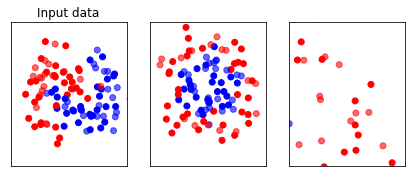

In [9]:
X += 2 * rng.uniform(size=X.shape)
figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
        
    pca1 = PCA()
    pca = decomposition.PCA()
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_t_train[:, 0], X_t_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_t_test[:, 0], X_t_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

In [10]:
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_t_train, y_train)
        score = clf.score(X_t_test, y_test)
        print(name,score)
        from sklearn.metrics import classification_report
        target_names = ['class 0', 'class 1']
        y_pred_class = clf.predict(X_t_test)
        print(classification_report(y_test,y_pred_class,target_names=target_names))
        i += 1

Nearest Neighbors 0.925925925926
             precision    recall  f1-score   support

    class 0       0.89      1.00      0.94        16
    class 1       1.00      0.82      0.90        11

avg / total       0.93      0.93      0.92        27

Linear SVM 0.925925925926
             precision    recall  f1-score   support

    class 0       1.00      0.88      0.93        16
    class 1       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        27

RBF SVM 0.592592592593
             precision    recall  f1-score   support

    class 0       0.59      1.00      0.74        16
    class 1       0.00      0.00      0.00        11

avg / total       0.35      0.59      0.44        27

Gaussian Process 0.814814814815
             precision    recall  f1-score   support

    class 0       0.82      0.88      0.85        16
    class 1       0.80      0.73      0.76        11

avg / total       0.81      0.81      0.81        27

Decision Tree 1.0
        

C:\Miniconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest 0.518518518519
             precision    recall  f1-score   support

    class 0       0.60      0.56      0.58        16
    class 1       0.42      0.45      0.43        11

avg / total       0.53      0.52      0.52        27

Neural Net 0.925925925926
             precision    recall  f1-score   support

    class 0       0.94      0.94      0.94        16
    class 1       0.91      0.91      0.91        11

avg / total       0.93      0.93      0.93        27

AdaBoost 1.0
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        16
    class 1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        27

Naive Bayes 0.592592592593
             precision    recall  f1-score   support

    class 0       0.59      1.00      0.74        16
    class 1       0.00      0.00      0.00        11

avg / total       0.35      0.59      0.44        27

QDA 0.814814814815
             precision    

C:\Miniconda2\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
